# Imporivng Gradient Descent, Batch Normalization and Dropout

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
titanic = sns.load_dataset('titanic').dropna()
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [3]:
X = titanic[['pclass','age','fare']]
y = titanic['survived']

X.head(), y.head()

(    pclass   age     fare
 1        1  38.0  71.2833
 3        1  35.0  53.1000
 6        1  54.0  51.8625
 10       3   4.0  16.7000
 11       1  58.0  26.5500,
 1     1
 3     1
 6     0
 10    1
 11    1
 Name: survived, dtype: int64)

In [4]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

## To Tensor

In [5]:
X = torch.tensor(X.values, dtype = torch.float32)
y = torch.tensor(y.values, dtype = torch.float32)
y = y.reshape(-1, 1)
type(X), type(y)

(torch.Tensor, torch.Tensor)

## Model 1

In [6]:
X.shape, y.shape

(torch.Size([182, 3]), torch.Size([182, 1]))

In [7]:
model = nn.Sequential(nn.Linear(in_features = 3, out_features = 100),
                      nn.ReLU(),
                      nn.Linear(in_features = 100, out_features = 1),
                      nn.Sigmoid())

In [8]:
# pass data through model
model(X)

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [0.9657],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [0.9998],
        [0.9989],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [0.9999],
        [1.0000],
        [0.9997],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [0.9992],
        [0.9943],
        [1.0000],
        [1.0000],
        [0.8549],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [0.9997],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1

### Loss

In [9]:
loss_fn = nn.BCELoss()
loss_fn(model(X), y)

tensor(21.7536, grad_fn=<BinaryCrossEntropyBackward0>)

This is our base loss

### Other optimizers

In [10]:
import torch.optim as optim

In [11]:
params = model.parameters()
list(params)

[Parameter containing:
 tensor([[-0.5504,  0.0010,  0.2318],
         [ 0.3917, -0.1430,  0.0935],
         [ 0.0858, -0.1485, -0.4210],
         [-0.5422,  0.3721,  0.0370],
         [-0.3988, -0.2743, -0.0692],
         [ 0.3746,  0.3069,  0.3742],
         [ 0.0747,  0.5051,  0.4899],
         [ 0.0359,  0.1514,  0.0239],
         [-0.3998,  0.2156,  0.3770],
         [-0.3508,  0.3834, -0.4108],
         [ 0.1313,  0.3313,  0.0762],
         [ 0.3621,  0.0512,  0.3761],
         [-0.3144, -0.0372,  0.2318],
         [-0.4324, -0.0591,  0.3261],
         [-0.3699, -0.5401, -0.3166],
         [-0.2723,  0.3308, -0.0154],
         [ 0.3603, -0.1190,  0.3454],
         [ 0.4791,  0.2969, -0.3651],
         [-0.4201, -0.5668, -0.4009],
         [-0.2182,  0.1821, -0.0887],
         [ 0.3606, -0.1222, -0.1977],
         [ 0.3127,  0.2886,  0.0269],
         [ 0.3518,  0.5468,  0.2177],
         [-0.1868, -0.4842, -0.0244],
         [-0.0185,  0.2492, -0.5485],
         [-0.5132, -0.1185,

In [12]:
sgd = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)

In [13]:
rms = optim.RMSprop(model.parameters())

In [14]:
adam = optim.Adam(model.parameters())

### Training Loop

In [15]:
def train(n_epochs, model, optimizer, loss_fn, X, y):
  for epoch in range(n_epochs):
    yhat = model(X)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if n_epochs % 10 == 0:
      print(f'Epoch {epoch}, Loss {loss}')

In [16]:
train(100, model, adam, loss_fn, X, y)

Epoch 0, Loss 21.753633499145508
Epoch 1, Loss 19.816598892211914
Epoch 2, Loss 17.385644912719727
Epoch 3, Loss 13.528337478637695
Epoch 4, Loss 11.934164047241211
Epoch 5, Loss 8.90687084197998
Epoch 6, Loss 6.752363681793213
Epoch 7, Loss 5.008768081665039
Epoch 8, Loss 3.2266294956207275
Epoch 9, Loss 2.7584211826324463
Epoch 10, Loss 1.816725492477417
Epoch 11, Loss 1.375326156616211
Epoch 12, Loss 1.285161018371582
Epoch 13, Loss 1.453723430633545
Epoch 14, Loss 1.6011648178100586
Epoch 15, Loss 1.6002589464187622
Epoch 16, Loss 1.4479433298110962
Epoch 17, Loss 1.1927262544631958
Epoch 18, Loss 0.9160696268081665
Epoch 19, Loss 0.7295657992362976
Epoch 20, Loss 0.7292490601539612
Epoch 21, Loss 0.7946429252624512
Epoch 22, Loss 0.8473673462867737
Epoch 23, Loss 0.87443608045578
Epoch 24, Loss 0.8773017525672913
Epoch 25, Loss 0.8621207475662231
Epoch 26, Loss 0.8368503451347351
Epoch 27, Loss 0.8096766471862793
Epoch 28, Loss 0.7881125807762146
Epoch 29, Loss 0.7779341340065002


### Predictions

In [17]:
preds = torch.where(model(X)>0.5,1,0)
preds[:5]

tensor([[1],
        [1],
        [1],
        [0],
        [0]])

### Accuracy

In [18]:
(((preds == y).sum() / len(y)) * 100)

tensor(64.8352)

## Model 2

### Add Batch Normalization

In [19]:
# add in batch norm
model2 = nn.Sequential(nn.Linear(3, 100),
                       nn.BatchNorm1d(num_features = 100),
                       nn.ReLU(),
                       nn.Linear(100, 64),
                       nn.BatchNorm1d(num_features = 64),
                       nn.ReLU(),
                       nn.Linear(64,1),
                       nn.Sigmoid())

### Optimizer

In [20]:
optimizer = optim.Adam(model2.parameters()) # contains initialized weights

### Train

We're going to train on 1000 epochs this time

In [21]:
train(1000, model2, optimizer, loss_fn, X, y)

Epoch 0, Loss 0.7187318801879883
Epoch 1, Loss 0.6940139532089233
Epoch 2, Loss 0.6736413240432739
Epoch 3, Loss 0.6598724722862244
Epoch 4, Loss 0.6508438587188721
Epoch 5, Loss 0.6430530548095703
Epoch 6, Loss 0.635843813419342
Epoch 7, Loss 0.6296009421348572
Epoch 8, Loss 0.6242901086807251
Epoch 9, Loss 0.6196474432945251
Epoch 10, Loss 0.6155181527137756
Epoch 11, Loss 0.6114365458488464
Epoch 12, Loss 0.6077669262886047
Epoch 13, Loss 0.6042829155921936
Epoch 14, Loss 0.601023256778717
Epoch 15, Loss 0.5980663895606995
Epoch 16, Loss 0.5953512787818909
Epoch 17, Loss 0.5929050445556641
Epoch 18, Loss 0.5906049609184265
Epoch 19, Loss 0.5884648561477661
Epoch 20, Loss 0.5864813923835754
Epoch 21, Loss 0.5847904682159424
Epoch 22, Loss 0.5832756161689758
Epoch 23, Loss 0.5818585157394409
Epoch 24, Loss 0.5805397629737854
Epoch 25, Loss 0.5792545676231384
Epoch 26, Loss 0.578025221824646
Epoch 27, Loss 0.5769222974777222
Epoch 28, Loss 0.5758368372917175
Epoch 29, Loss 0.5747784972

### Predictions

In [22]:
preds = torch.where(model2(X) >= 0.5, 1, 0)

### Accuracy

In [23]:
(preds == y).sum() / len(y)

tensor(0.8791)

We've improved out model by almost 20% of accuracy

## Model 3

Instead of using 2 BatchNorm1d layers, let's use just one layer with dropout layer on first lineary layer

### Add Dropout

In [24]:
model3 = nn.Sequential(nn.Dropout(p = .1), # We need to pass dropout before layer on which we want to use dropout
                       nn.Linear(in_features = 3, out_features = 100),
                       nn.ReLU(),
                       nn.BatchNorm1d(num_features = 100),
                       nn.ReLU(),
                       nn.Linear(in_features = 100, out_features = 1),
                       nn.Sigmoid())

### Train

In [25]:
train(1000, model3, optimizer, loss_fn, X, y)

Epoch 0, Loss 0.7531505823135376
Epoch 1, Loss 0.7629208564758301
Epoch 2, Loss 0.7684565186500549
Epoch 3, Loss 0.7613407373428345
Epoch 4, Loss 0.7576021552085876
Epoch 5, Loss 0.7553797364234924
Epoch 6, Loss 0.7501975893974304
Epoch 7, Loss 0.7481036186218262
Epoch 8, Loss 0.7505272030830383
Epoch 9, Loss 0.7515580058097839
Epoch 10, Loss 0.7525889873504639
Epoch 11, Loss 0.7519691586494446
Epoch 12, Loss 0.7527993321418762
Epoch 13, Loss 0.7566421031951904
Epoch 14, Loss 0.748110830783844
Epoch 15, Loss 0.7620344161987305
Epoch 16, Loss 0.7683278322219849
Epoch 17, Loss 0.7644265294075012
Epoch 18, Loss 0.7638376951217651
Epoch 19, Loss 0.7518121004104614
Epoch 20, Loss 0.7592588067054749
Epoch 21, Loss 0.748649537563324
Epoch 22, Loss 0.7507683038711548
Epoch 23, Loss 0.7615677714347839
Epoch 24, Loss 0.7572574615478516
Epoch 25, Loss 0.7631886005401611
Epoch 26, Loss 0.7479705810546875
Epoch 27, Loss 0.7452613115310669
Epoch 28, Loss 0.754539966583252
Epoch 29, Loss 0.7535418868

### Predictions

In [26]:
preds = torch.where(model3(X) >= 0.5, 1, 0)

### Accuracy

In [27]:
(preds == y).sum() / len(y)

tensor(0.3187)

This is horrible. We should stick to previous model or choose a different one approach

## Mini-Batch Updates

If we want to train by mini-batches we need to use DataLoader object and to use DataLoader object we need our data to be a Dataset object. So let's create those

### Make a dataset

In [31]:
from torch.utils.data import Dataset, DataLoader

In [32]:
class TitanicData(Dataset):
  def __init__(self, X, y):
    self.x = X
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem(self, idx):
    return self.x[idx], self.y[idx]

### Initialize dataset

In [33]:
data = TitanicData(X, y)

### DataLoader for batches

In [34]:
loader = DataLoader(data, batch_size = 24)

Now we have DataLoader object where mini_batch size is 24. This changes how we update the weights and biases

### Train on mini batches

For mini batches we need to set a bit different train function

In [35]:
def train_mb(epochs, model, optimizer, loss_fn, dataloader):
  for epoch in range(epochs): # here we iterate through epochs
    for x, y in dataloader: # then in each epoch we iterate through mini batch
      yhat = model(x)
      loss = loss_fn(yhat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

## Convolutions

In [42]:
np.random.seed(22)
im = np.random.randint(low = 1, high = 10, size = 25).reshape(5, 5)

### three by three filters

In [43]:
f = np.zeros((3,3))
f

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [44]:
f[:,0] = 1
f[:, -1] = -1
f

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

### Side by side images

<Axes: >

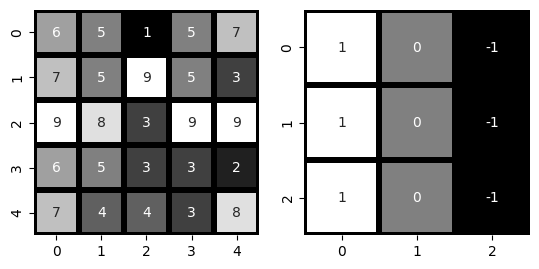

In [48]:
fig, ax = plt.subplots(1,2)

sns.heatmap(im,
            annot = True,
            cmap = 'gray',
            cbar = False,
            square = True,
            linewidth = 4,
            linecolor = 'black',
            ax = ax[0])

sns.heatmap(f,
            annot = True,
            cmap = 'gray',
            cbar = False,
            square = True,
            linewidth = 4,
            linecolor = 'black',
            ax = ax[1])

### Convolve

Select upper left corner of image

In [49]:
im[:3, :3] # upper left corner of an image of size of filter

array([[6, 5, 1],
       [7, 5, 9],
       [9, 8, 3]])

In [50]:
np.sum(im[:3,:3]*f) # multiply this corner square by filter, meaning convolve

9.0

Do it for every square in the image with stride = 1

In [51]:
output = np.zeros((3,3)) # this is placeholder for output layer which will have size same as filter
for row in range(3):
  for col in range(3):
    output[row, col] = np.sum(f*im[row: row + 3, col: col+3])

<Axes: >

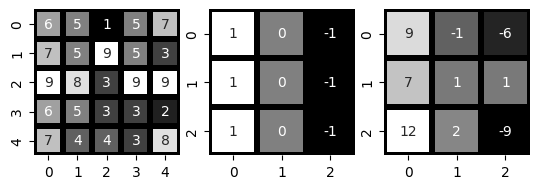

In [55]:
fig, ax = plt.subplots(1,3)

sns.heatmap(im,
            annot = True,
            cmap = 'gray',
            cbar = False,
            square = True,
            linewidth = 4,
            linecolor = 'black',
            ax = ax[0])

sns.heatmap(f,
            annot = True,
            cmap = 'gray',
            cbar = False,
            square = True,
            linewidth = 4,
            linecolor = 'black',
            ax = ax[1])

sns.heatmap(output,
            annot = True,
            cmap = 'gray',
            cbar = False,
            square = True,
            linewidth = 4,
            linecolor = 'black',
            ax = ax[2])

### Example

In [56]:
from torchvision.datasets import FashionMNIST

In [58]:
train = FashionMNIST(root = '.', download = True)

100%|██████████| 26421880/26421880 [00:03<00:00, 8051427.72it/s] 


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 136058.82it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2508783.56it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18566016.33it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [60]:
train[0]

(<PIL.Image.Image image mode=L size=28x28>, 9)

In [59]:
from torchvision.transforms import ToTensor

In [62]:
train = FashionMNIST(root = '.', download = True, transform = ToTensor())

In [63]:
train[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [65]:
conv = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 3)

In [67]:
train[0][0].shape

torch.Size([1, 28, 28])

In [66]:
output = conv(train[0][0])
output.shape

torch.Size([1, 26, 26])

We've lost 2 pixels in width and length due to kernel = 3

To prevent loss of pixels we can add padding

In [68]:
conv = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 3, padding = 1)

In [69]:
output = conv(train[0][0])
output.shape

torch.Size([1, 28, 28])

Now we haven't loss the pixels